In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.spatial import distance
from scipy.cluster import hierarchy

In [28]:
my_data=pd.read_csv('all_data_filtered.csv')
my_data.head(10)
my_data.index=my_data['Patient_id']
my_data=my_data.drop(['Patient_id'],axis=1)
my_data.head()
y=my_data['MRD Response']
X=my_data.drop(['MRD Response'],axis=1)

In [4]:
CorrPatients=np.corrcoef(X)

In [5]:
CorrGenes=np.corrcoef(X.T)

/home/syrine/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/syrine/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

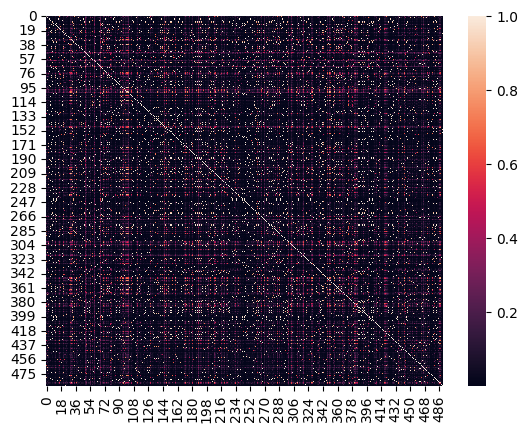

In [5]:
sns.heatmap(CorrPatients)

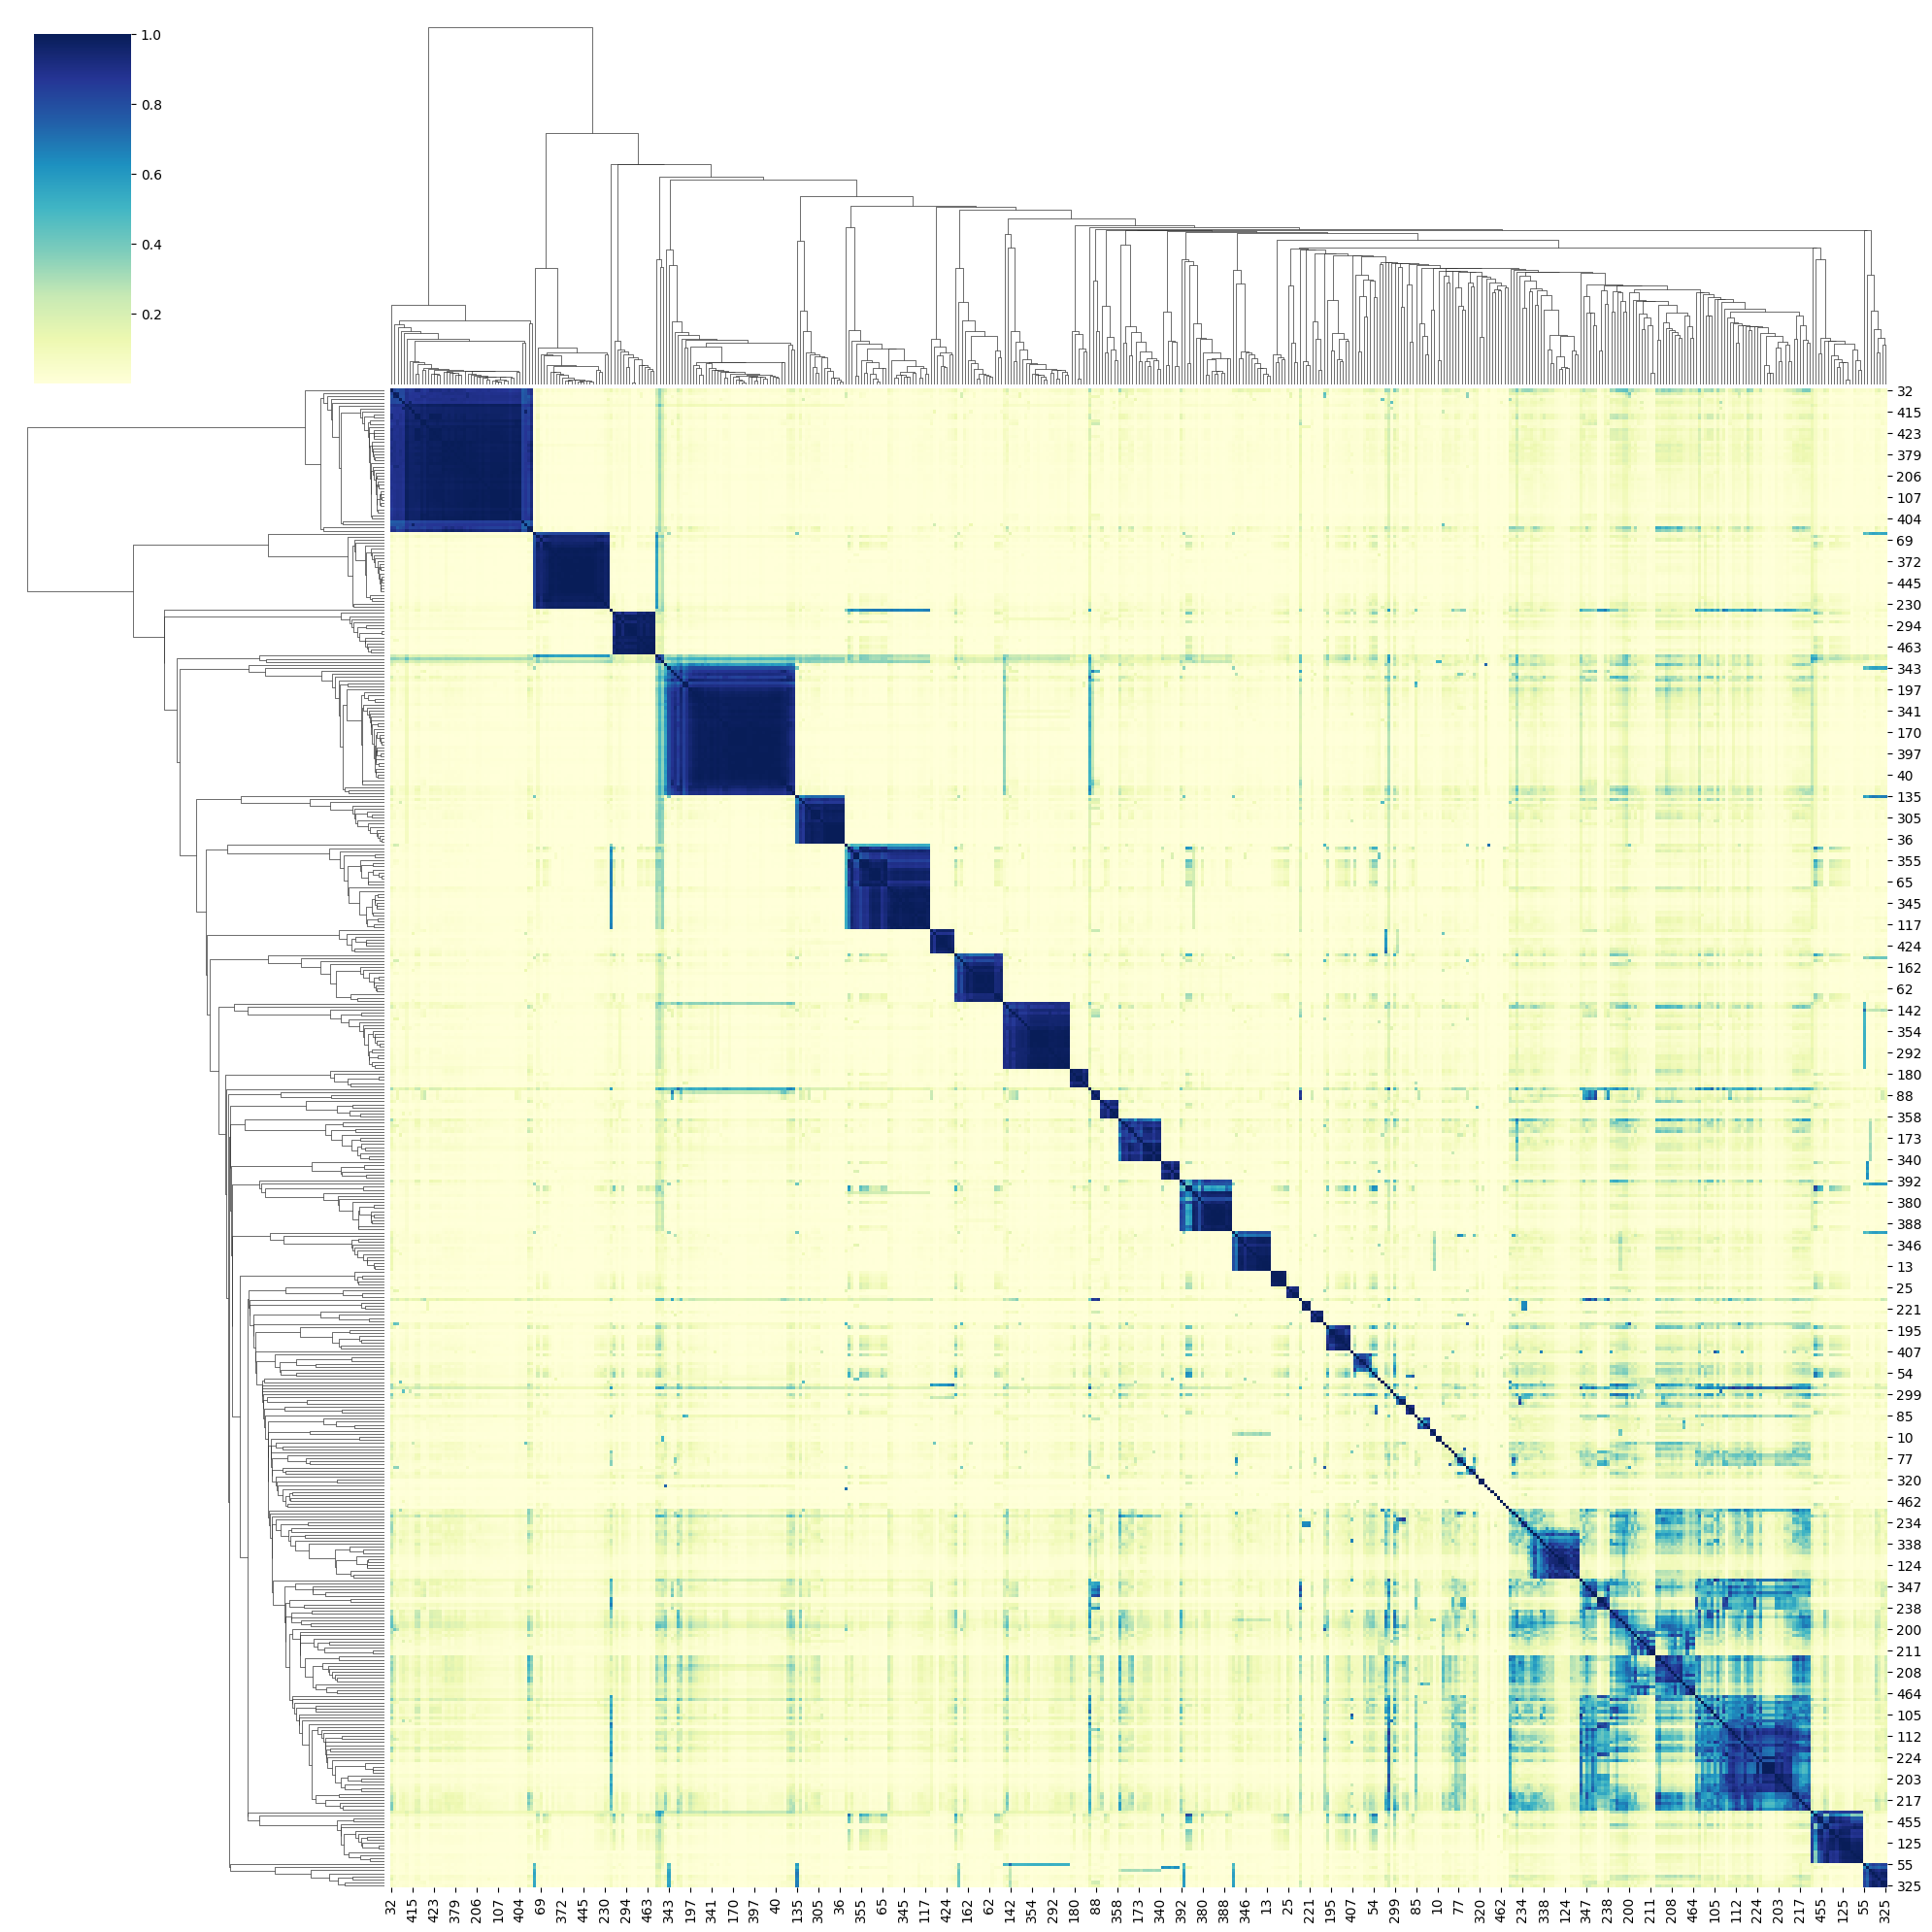

In [11]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

row_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients), method='single')
col_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients.T), method='single')
    
cl=sns.clustermap(CorrPatients, row_linkage=row_linkage,col_linkage=col_linkage,figsize=(20, 20), cmap="YlGnBu")
cl.savefig('CorrelationClusteringEuclidean.pdf') 

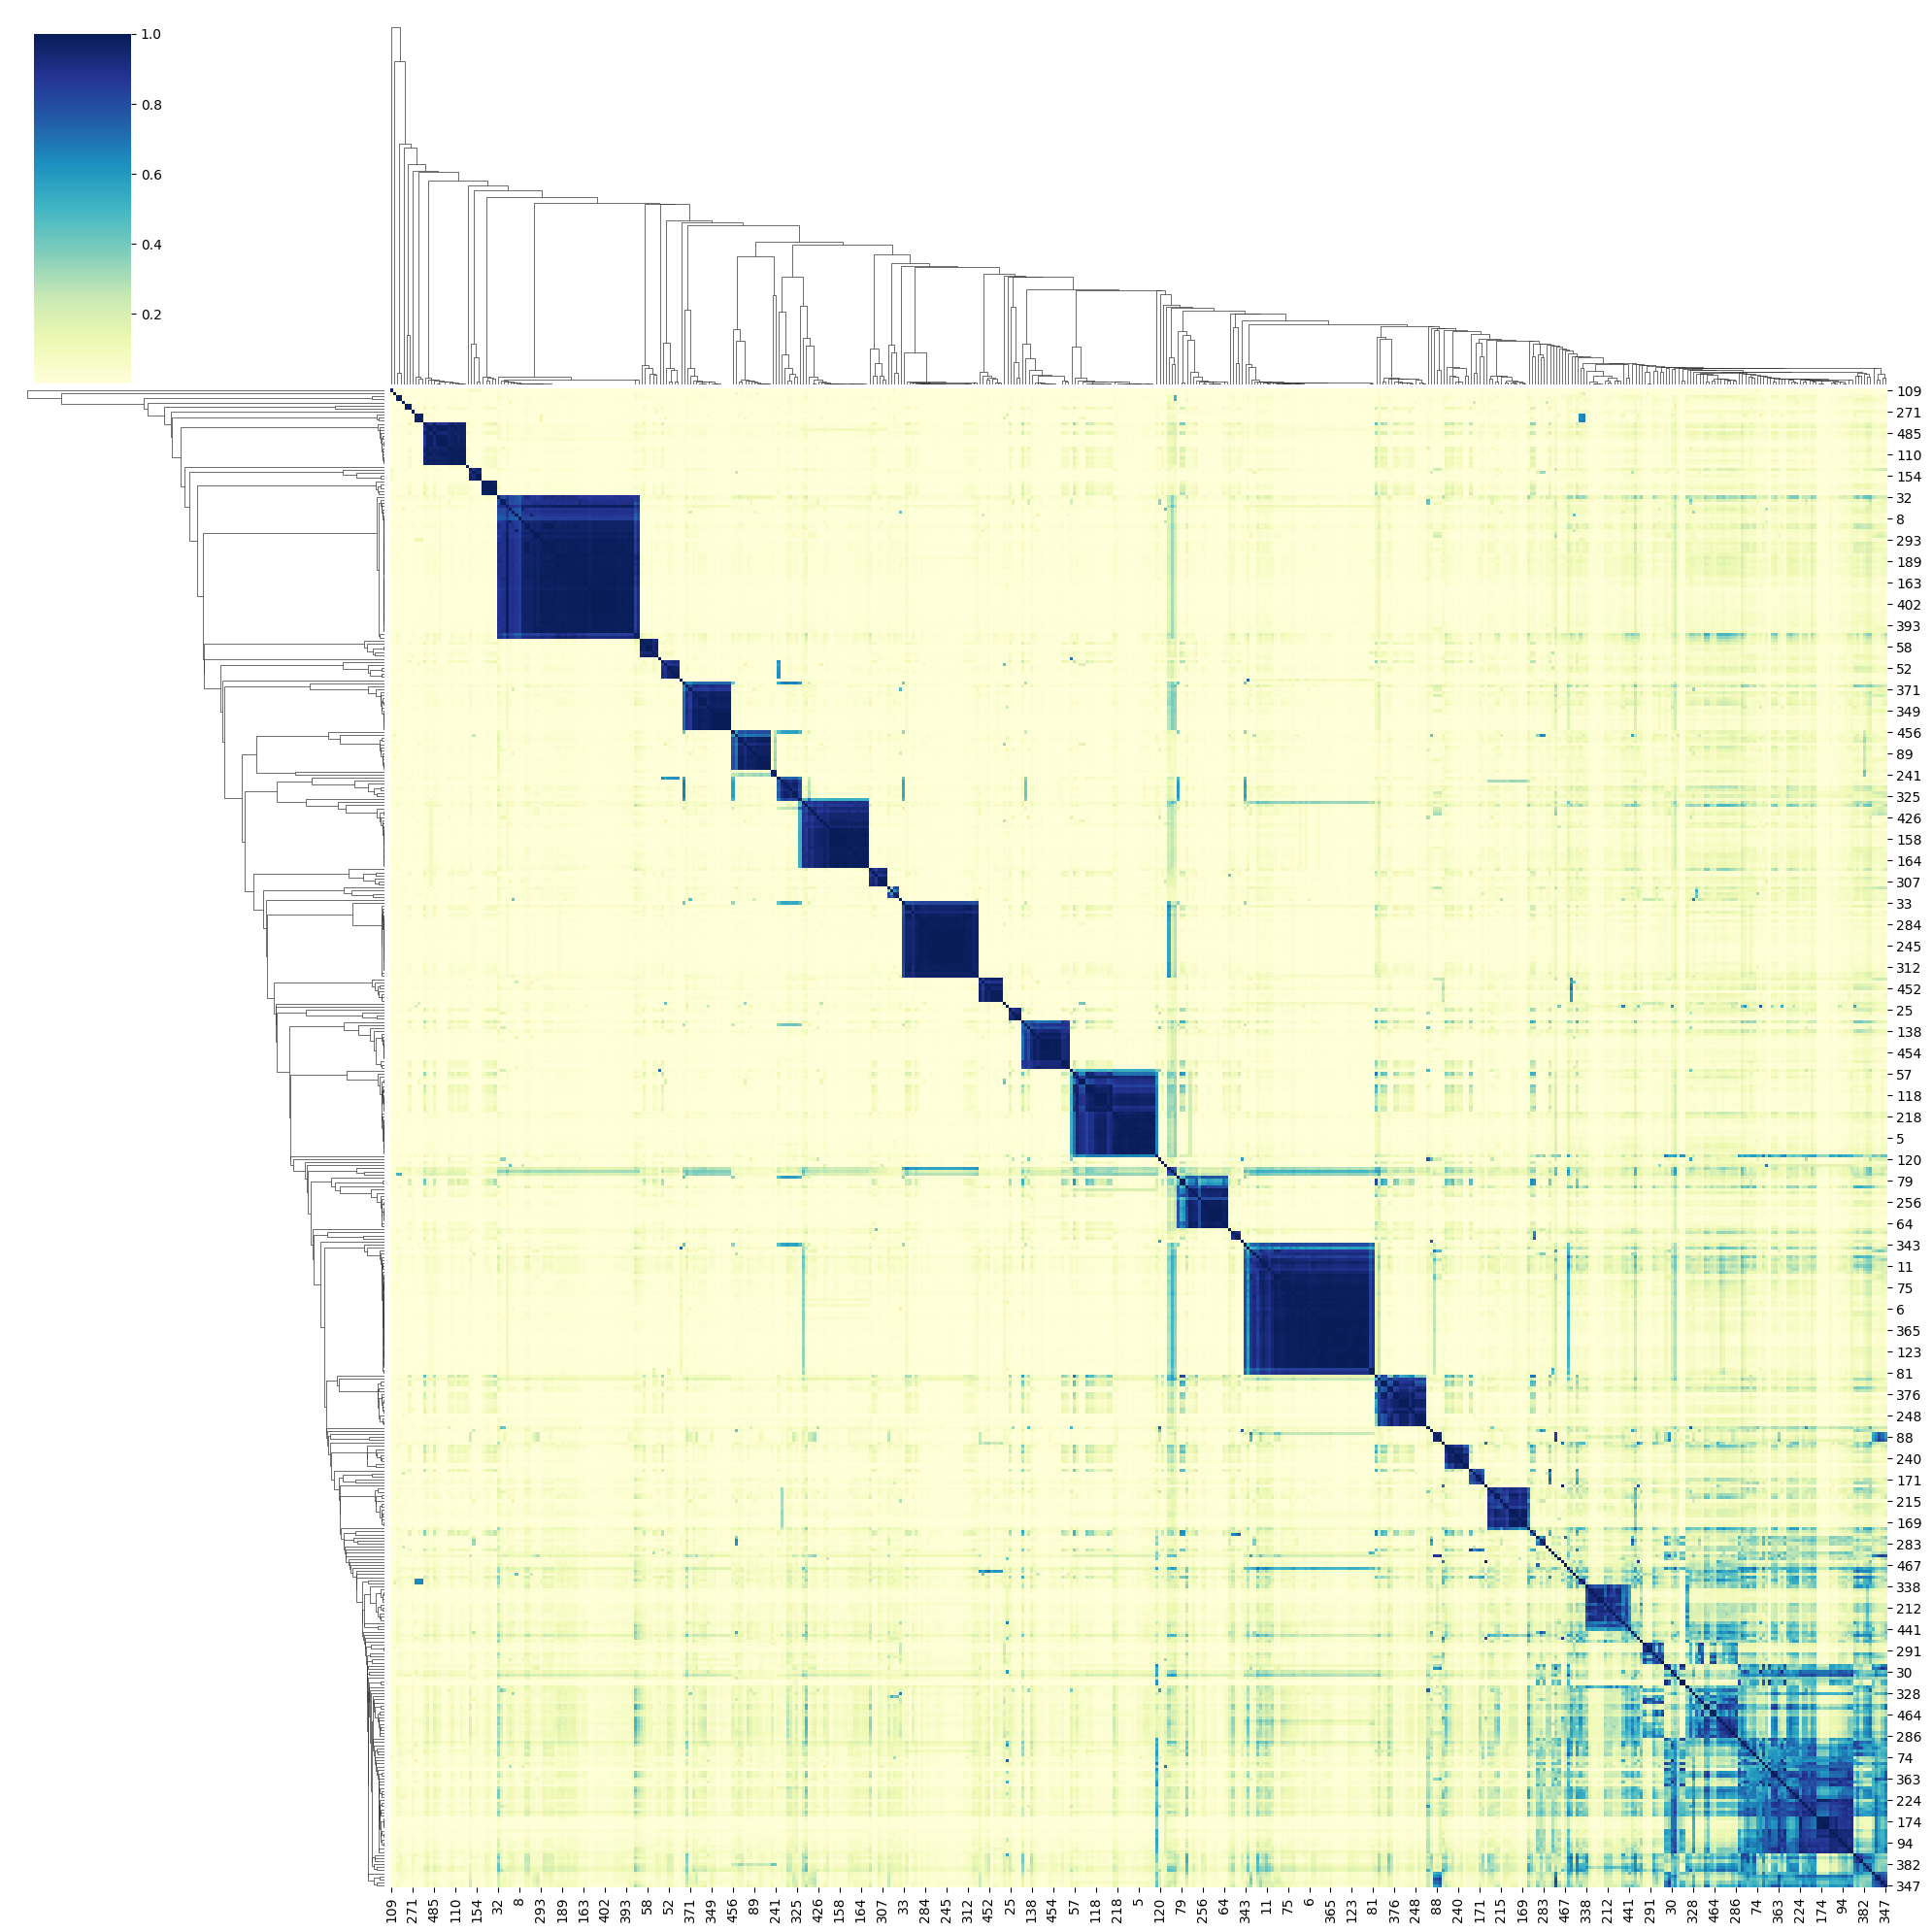

In [12]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

row_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients,metric='cosine'), method='single')
col_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients.T,metric='cosine'), method='single')
    
cl=sns.clustermap(CorrPatients, row_linkage=row_linkage,col_linkage=col_linkage,figsize=(20, 20), cmap="YlGnBu")
cl.savefig('CorrelationClusteringCosine.pdf') 

In [14]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

row_linkage = hierarchy.linkage(
    distance.pdist(CorrGenes,metric='cosine'), method='single')
col_linkage = hierarchy.linkage(
    distance.pdist(CorrGenes.T,metric='cosine'), method='single')
    
cl=sns.clustermap(CorrGenes, row_linkage=row_linkage,col_linkage=col_linkage,figsize=(20, 20), cmap="YlGnBu")
cl.savefig('CorrelationGenesClusteringCosine.pdf') 

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [32.5, 32.5, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [140.0, 140.0, 162.5, 162.5],
  [125.0, 125.0, 151.25, 151.25],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [195.0, 195.0, 221.25, 221.25],
  [185.0, 185.0, 208.125, 208.125],
  [138.125, 138.125, 196.5625, 196.5625],
  [110.0, 110.0, 167.34375, 167.34375],
  [95.0, 95.0, 138.671875, 138.671875],
  [85.0, 85.0, 116.8359375, 116.8359375],
  [75.0, 75.0, 100.91796875, 100.91796875],
  [46.25, 46.25, 87.958984375, 87.958984375],
  [15.0, 15.0, 67.1044921875, 67.1044921875],
  [5.0, 5.0, 41.05224609375, 41.05224609375],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [255.0, 255.0, 273.75, 273.75],
  [23.0261

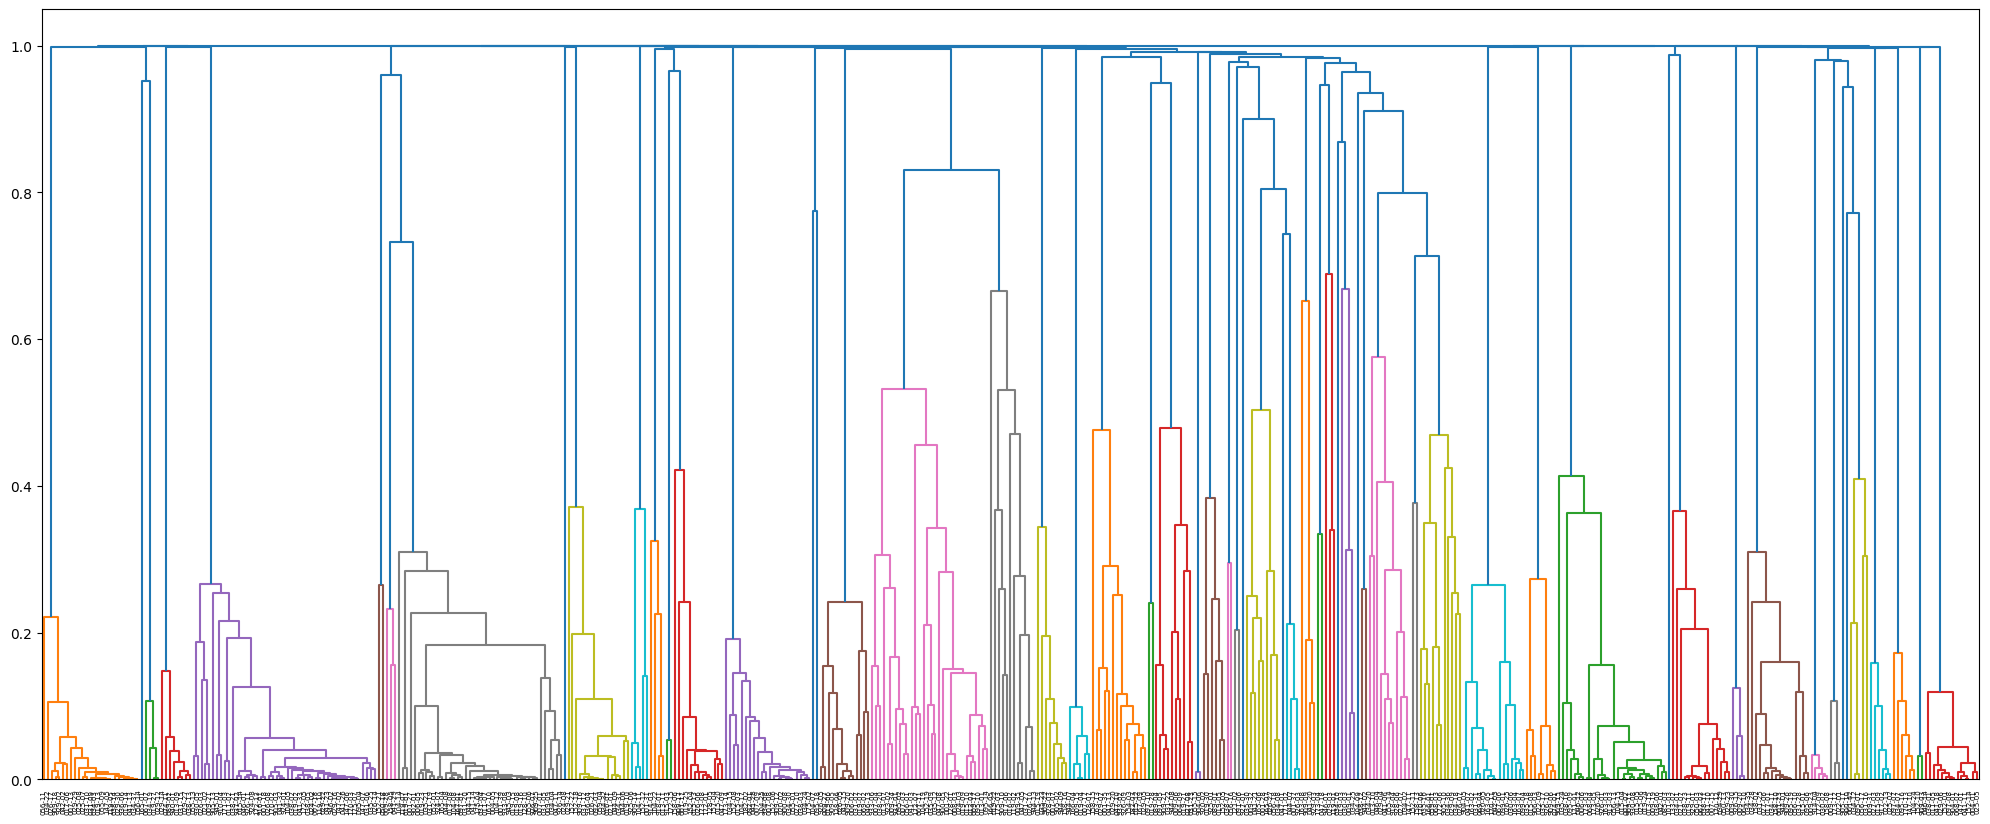

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster,distance
from scipy.spatial.distance import squareform

plt.figure(figsize=(25,10))
distance=distance.pdist(X,metric='cosine')
Z = linkage(distance, 'complete')

dendrogram(Z, labels=X.index, orientation='top', 
           leaf_rotation=90)

### Impact of scaling

In [30]:
from sklearn.preprocessing import normalize

In [31]:
X_s=normalize(X,norm='l1')

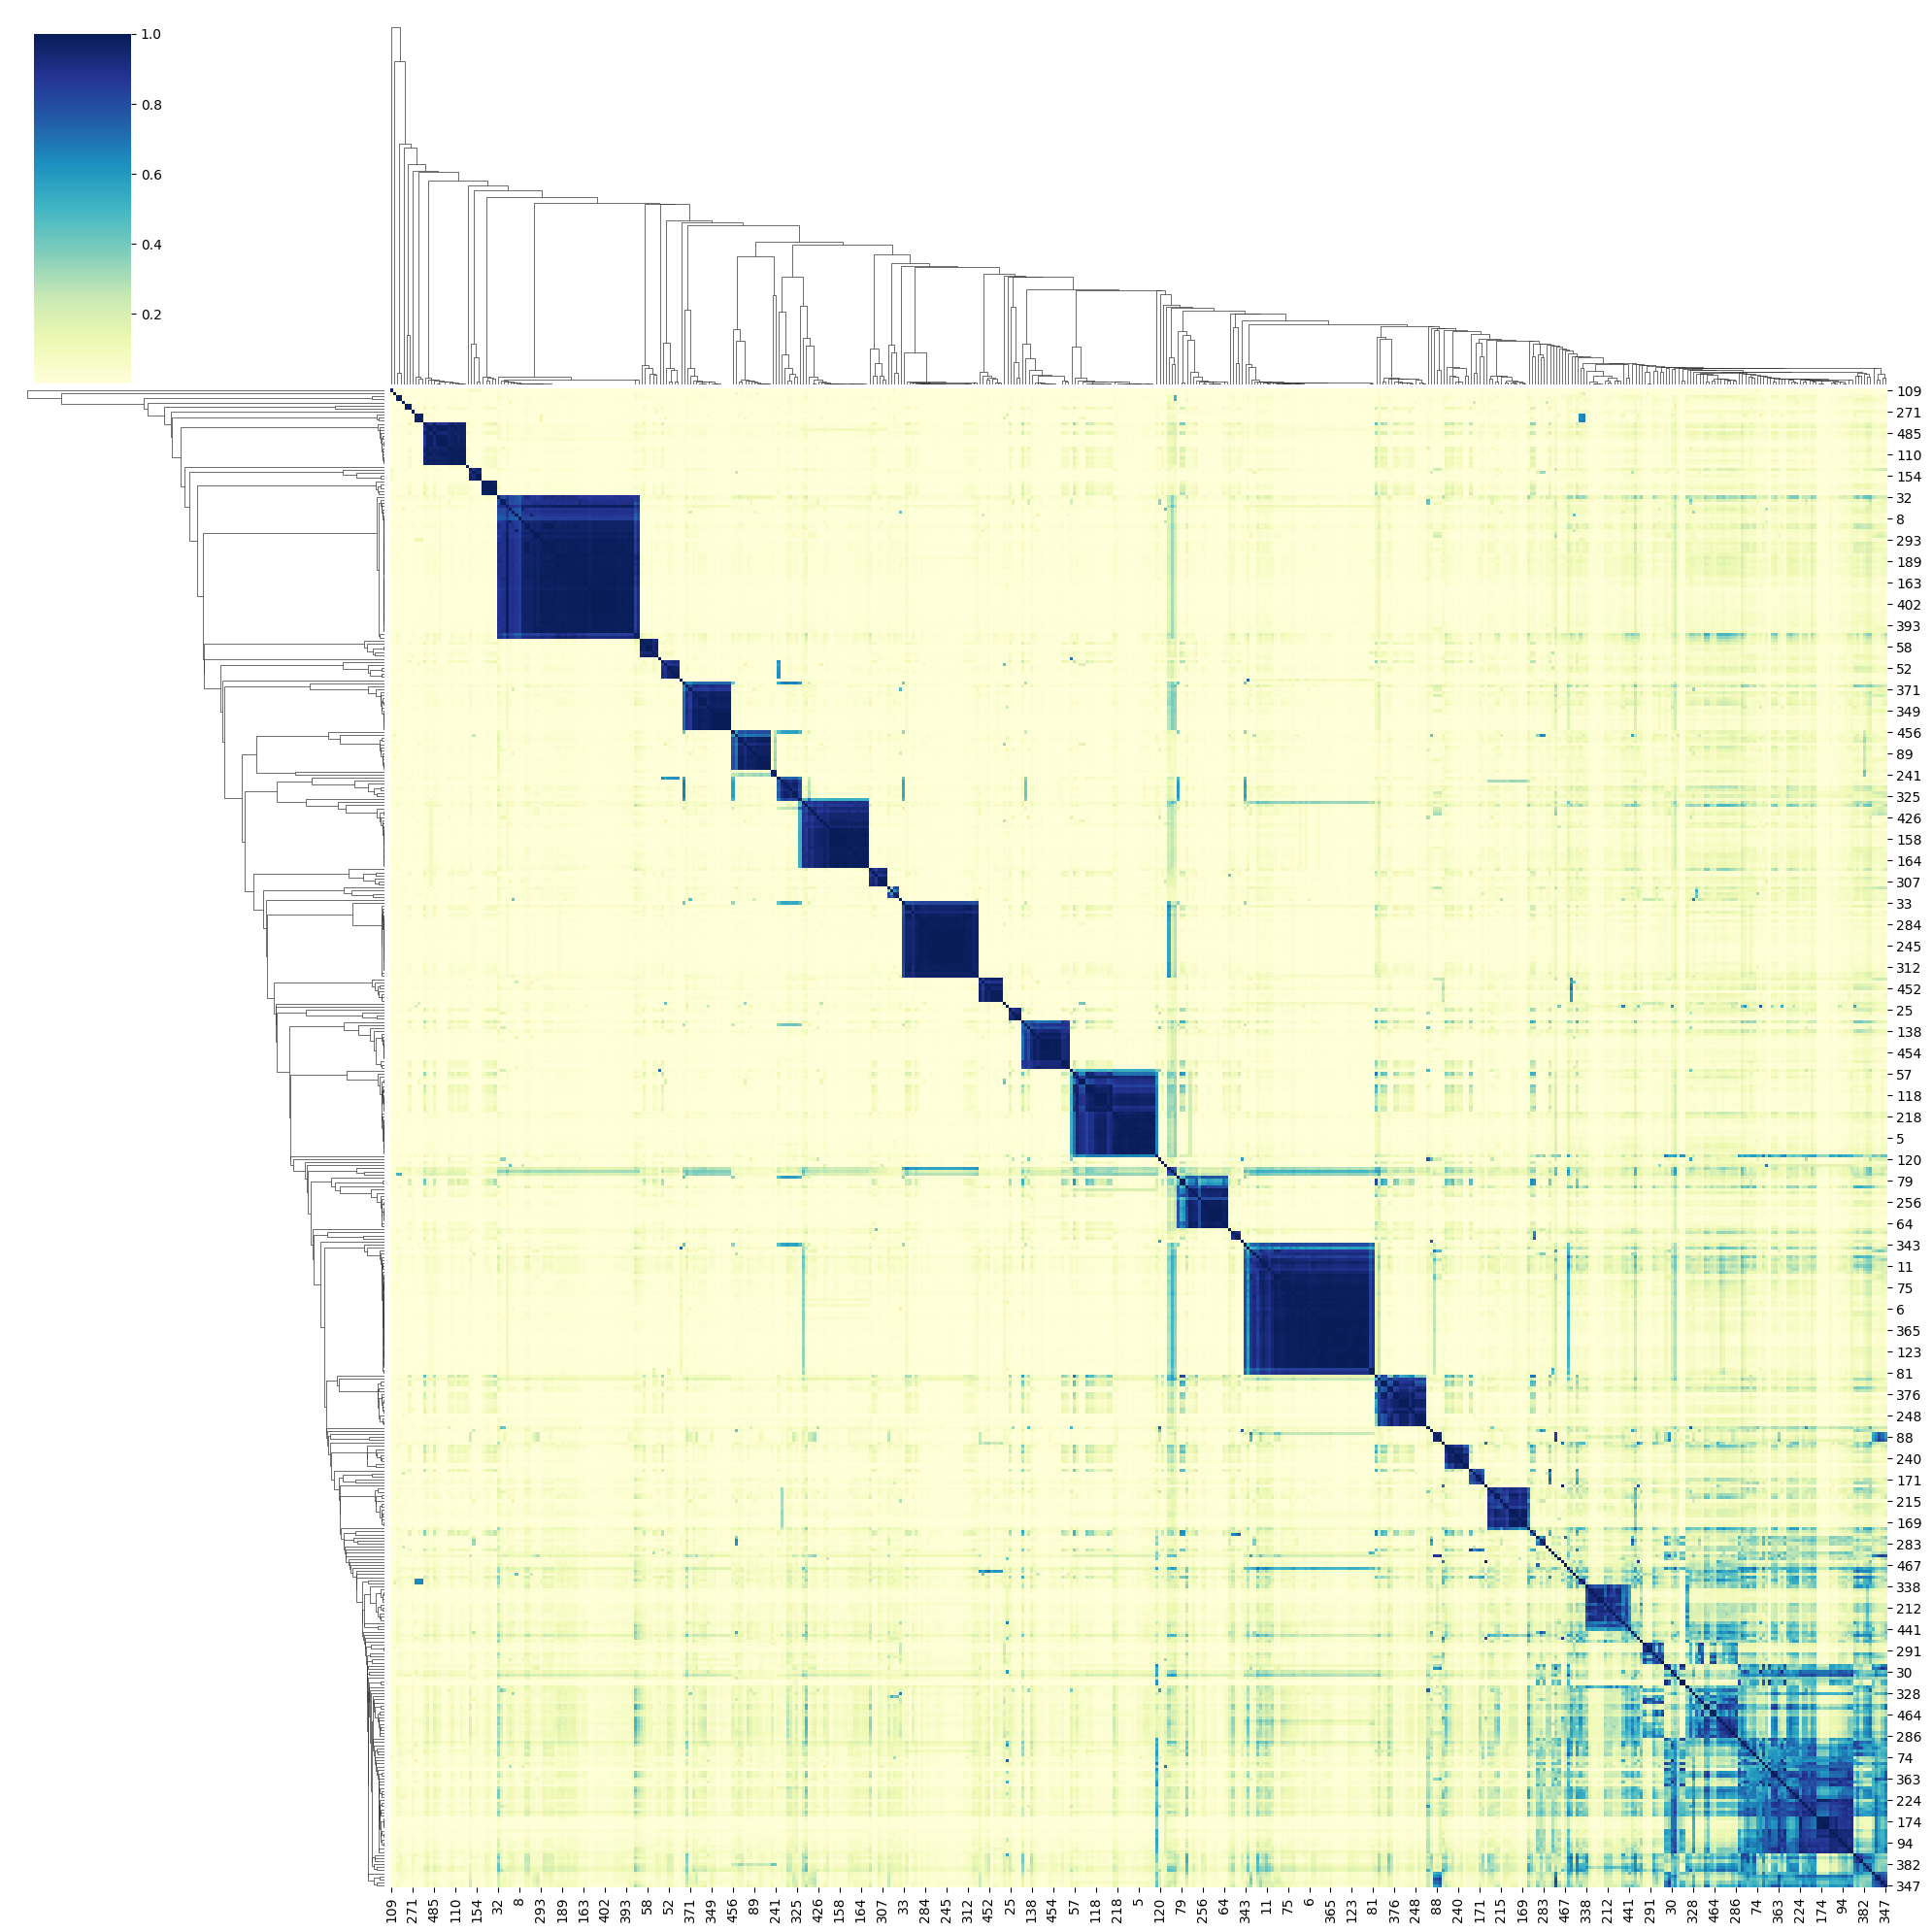

In [37]:
CorrPatients_=np.corrcoef(X_s)
#reperform clustering on patients corr map
row_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients_, metric='cosine'), method='single')
col_linkage = hierarchy.linkage(
    distance.pdist(CorrPatients_.T,metric='cosine'), method='single')
    
cl=sns.clustermap(CorrPatients_, row_linkage=row_linkage,col_linkage=col_linkage,figsize=(20, 20), cmap="YlGnBu")
cl.savefig('CorrelationClusteringEuclidean.pdf') 